In [17]:
import numpy as np

In [1]:
# Catan: Two Dice Sum Simulator

import random
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

If the graph does not run, you might have to enable the widgets to run.

`jupyter nbextension enable --py widgetsnbextension`

See https://stackoverflow.com/questions/36351109/ipython-notebook-ipywidgets-does-not-show

In [27]:
%matplotlib inline

def roll_dice():
    return random.randint(1, 6)

def simulate_dice_rolls(num_rolls):
    rolls = []
    for _ in range(num_rolls):
        dice1 = roll_dice()
        dice2 = roll_dice()
        rolls.append(dice1 + dice2)
    return rolls

def visualize_dice_sum(num_rolls):
    
    rolls = simulate_dice_rolls(num_rolls)
    plt.figure(figsize=(8, 6))  # Set the figure size (width, height)
    plt.hist(rolls, bins=range(2, 14), align='left', rwidth=0.8)
    plt.xlabel('Sum of Two Dice')
    plt.ylabel('Frequency')
    plt.title(f'Sum of Two Dice Rolls, n={num_rolls}')
    plt.xticks(range(2, 13))
    
    #plt.show()

# Interactive visualization using a slider
num_rolls_slider = widgets.IntSlider(min=1, max=1000, value=50, description='Number of Rolls')
interactive_plot = widgets.interactive_output(visualize_dice_sum, {'num_rolls': num_rolls_slider})

display(num_rolls_slider, interactive_plot)



IntSlider(value=50, description='Number of Rolls', max=1000, min=1)

Output()

Button(description='Roll Dice X times', style=ButtonStyle())

IntSlider(value=1, description='X', max=2000, min=1)

<IPython.core.display.Javascript object>


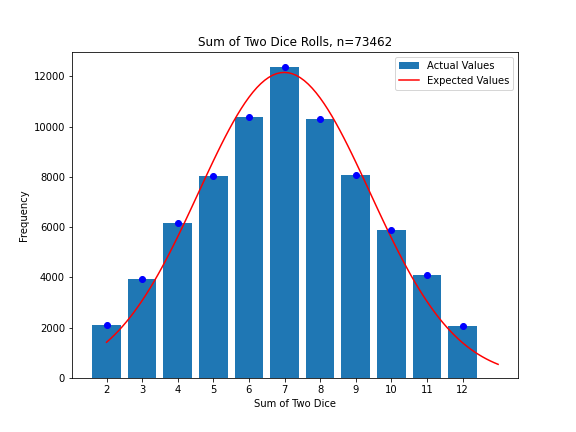

In [42]:
%matplotlib notebook
import random
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
import numpy as np
from scipy.stats import norm

rolls = []

def roll_dice():
    return random.randint(1, 6)

def simulate_dice_roll(b):
    num_rolls = roll_slider.value
    for _ in range(num_rolls):
        dice1 = roll_dice()
        dice2 = roll_dice()
        rolls.append(dice1 + dice2)
    visualize_dice_sum()

def visualize_dice_sum():
    #plt.cla()  # Clear the current axes
    plt.clf()  # Clear the current axes
    
   # frequencies, bins, _ = plt.hist(rolls, bins=range(2, 14), align='left', rwidth=0.8, density=True, alpha=0.7)
    frequencies, bins, patches = plt.hist(rolls, bins=range(2, 14), align='left', rwidth=0.8, label="Actual Values")
    plt.xlabel('Sum of Two Dice')
    plt.ylabel('Frequency')
    plt.title(f'Sum of Two Dice Rolls, n={len(rolls)}')
    plt.xticks(range(2, 13))
    
    # Plotting normal distribution line
    mean = np.mean(rolls)
    std = np.std(rolls)
    x = np.linspace(2, 13, 100)
    y = norm.pdf(x, mean, std)
    
    # Scale the normal distribution line
    scaling_factor = len(rolls)
    y_scaled = y * scaling_factor
    
    plt.plot(x, y_scaled, 'r-', label='Expected Values')
    plt.legend()
    
    # Add dots at the top of the histogram bars
    for i, frequency in enumerate(frequencies):
        plt.plot(bins[i], frequency, 'bo')
    
    #plt.grid()
    plt.draw()

# Button to roll dice
roll_button = widgets.Button(description='Roll Dice X times')
roll_button.on_click(simulate_dice_roll)

# Slider for number of rolls
roll_slider = widgets.IntSlider(min=1, max=2000, value=1, description='X')

# Display the button, slider, and initial empty plot
display(roll_button, roll_slider)
fig, ax = plt.subplots(figsize=(8, 6))  # Set the initial figure size

# Call visualize_dice_sum initially
visualize_dice_sum()

